# 📊 General Ledger Financial Analysis Project

## 🎯 Project Overview
This project analyzes a company's general ledger dataset containing over 2,000 journal entries. Each entry includes account details, debit/credit amounts, department, cost center, and currency. The goal is to extract meaningful financial insights and build structured reports.

## 📁 Dataset Contents
- Transaction date  
- Account number and name  
- Debit and credit values  
- Department and cost center  
- Description and currency

## ✅ Key Objectives
- Build a trial balance by aggregating account activity  
- Generate department-level profit & loss statements  
- Analyze revenue and expense trends over time  
- Explore multi-currency impact on financial performance  
- Create visual dashboards and summary reports

## 🛠️ Tools Used
- Python  
- Pandas  
- Matplotlib / Seaborn  
- Jupyter Notebook or VS Code

In [1]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import matplotlib for plotting charts and visualizing financial trends
import matplotlib.pyplot as plt

# Import seaborn for enhanced statistical visualizations
import seaborn as sns

# Optional: Set seaborn style for cleaner plots
sns.set(style="whitegrid")

In [2]:
# Step 1: Define the path to the Excel file
file_path = r"C:\Users\loudy\Desktop\For Freelancer\process proj\financial_analysis_fy2025.xlsx"

# Step 2: Load the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Step 3: Display the first 5 rows to preview the data
df.head()

,GLID,TxnDate,AccountNumber,AccountName,Debit,Credit,Dept,CostCenter,Description,Currency
0,GL000000,2024-05-05,4000,Sales Revenue,0.00,2505.15,Sales,CC500,AutoPost 0,GBP
1,GL000001,2024-06-23,5000,COGS,1184.73,0.00,HR,CC500,AutoPost 1,GBP
2,GL000002,2025-01-09,5000,COGS,748.25,0.00,IT,CC300,AutoPost 2,EUR
3,GL000003,2023-09-30,6000,Payroll Expense,1610.64,0.00,Sales,CC400,AutoPost 3,AUD
4,GL000004,2023-08-03,5000,COGS,1053.12,0.00,HR,CC400,AutoPost 4,USD


In [3]:
# Step 4: Print the column names to verify the structure
df.columns

Index(['GLID', 'TxnDate', 'AccountNumber', 'AccountName', 'Debit', 'Credit',
       'Dept', 'CostCenter', 'Description', 'Currency'],
      dtype='object')

In [4]:
# Display basic info about the DataFrame: column types, non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   GLID           2000 non-null   object        
 1   TxnDate        2000 non-null   datetime64[ns]
 2   AccountNumber  2000 non-null   int64         
 3   AccountName    2000 non-null   object        
 4   Debit          2000 non-null   float64       
 5   Credit         2000 non-null   float64       
 6   Dept           2000 non-null   object        
 7   CostCenter     2000 non-null   object        
 8   Description    2000 non-null   object        
 9   Currency       2000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 156.4+ KB


In [5]:
# Show summary statistics for numeric columns (Debit, Credit)
print(df.describe())

                          TxnDate  AccountNumber        Debit       Credit
count                        2000      2000.0000  2000.000000  2000.000000
mean   2024-04-09 00:11:31.200000      4798.5700   605.120235   986.640965
min           2023-01-01 00:00:00      4000.0000     0.000000     0.000000
25%           2023-09-02 00:00:00      4010.0000     0.000000     0.000000
50%           2024-04-15 00:00:00      5000.0000   391.945000     0.000000
75%           2024-11-18 00:00:00      5010.0000  1158.485000  1819.547500
max           2025-06-30 00:00:00      6000.0000  1999.520000  4999.530000
std                           NaN       743.7898   654.176238  1503.695875


In [6]:
# Count missing values in each column
print(df.isnull().sum())

GLID             0
TxnDate          0
AccountNumber    0
AccountName      0
Debit            0
Credit           0
Dept             0
CostCenter       0
Description      0
Currency         0
dtype: int64


In [7]:
# Optional: Show unique values in key columns like Dept and Currency
print("Unique departments:", df["Dept"].unique())
print("Unique currencies:", df["Currency"].unique())

Unique departments: ['Sales' 'HR' 'IT' 'Marketing' 'Finance' 'Operations']
Unique currencies: ['GBP' 'EUR' 'AUD' 'USD' 'CAD']


## 📌 Step 1: Trial Balance Summary

Before diving into detailed financial analysis, we start by building a trial balance.  
This helps us verify that all journal entries are properly balanced and gives us a clear view of total activity per account.

### Why it's important:
- Ensures debit and credit totals match across all entries  
- Highlights the most active accounts in the ledger  
- Serves as a foundation for building income statements and departmental reports


In [8]:
# Step 1: Group by AccountName and calculate total Debit and Credit
trial_balance = df.groupby("AccountName")[["Debit", "Credit"]].sum().reset_index()

# Step 2: Display the trial balance table
print(trial_balance)

       AccountName      Debit      Credit
0             COGS  397936.33        0.00
1     Online Sales       0.00  1014147.86
2  Payroll Expense  399923.66        0.00
3    Sales Revenue       0.00   959134.07
4   Travel Expense  412380.48        0.00


## 🧮 Step 2: Trial Balance by Account

In [9]:
# Step 1: Group data by AccountName and calculate total Debit and Credit per account
trial_balance = df.groupby("AccountName")[["Debit", "Credit"]].sum().reset_index()

# Step 2: Add a Net column to show the difference between Debit and Credit
trial_balance["Net"] = trial_balance["Debit"] - trial_balance["Credit"]

# Step 3: Sort accounts by absolute Net value (most active accounts first)
trial_balance["AbsNet"] = trial_balance["Net"].abs()
trial_balance = trial_balance.sort_values(by="AbsNet", ascending=False).drop(columns="AbsNet")

# Step 4: Display the trial balance summary
print(trial_balance)

       AccountName      Debit      Credit         Net
1     Online Sales       0.00  1014147.86 -1014147.86
3    Sales Revenue       0.00   959134.07  -959134.07
4   Travel Expense  412380.48        0.00   412380.48
2  Payroll Expense  399923.66        0.00   399923.66
0             COGS  397936.33        0.00   397936.33


## 📌 Step 3: Department-Level Profit & Loss Analysis

Now that we’ve built a general P&L statement, it’s time to break it down by department.  
This helps us understand which departments are generating revenue, incurring costs, and contributing to overall profitability.

### Why it's useful:
- Reveals high-performing vs. high-cost departments  
- Supports internal budgeting and resource allocation  
- Helps identify areas for cost control or investment


In [10]:
# Group revenue accounts and sum their Credit values by department
revenue_by_dept = df[df["AccountName"].isin(["Sales Revenue", "Online Sales"])] \
                    .groupby("Dept")["Credit"].sum().reset_index()

# Rename column for clarity
revenue_by_dept.rename(columns={"Credit": "Revenue"}, inplace=True)

In [11]:
# Group COGS accounts and sum their Debit values by department
cogs_by_dept = df[df["AccountName"] == "COGS"] \
                 .groupby("Dept")["Debit"].sum().reset_index()

# Rename column for clarity
cogs_by_dept.rename(columns={"Debit": "COGS"}, inplace=True)

In [12]:
# Group expense accounts and sum their Debit values by department
expenses_by_dept = df[df["AccountName"].isin(["Payroll Expense", "Travel Expense"])] \
                     .groupby("Dept")["Debit"].sum().reset_index()

# Rename column for clarity
expenses_by_dept.rename(columns={"Debit": "Expenses"}, inplace=True)

In [13]:
# Merge revenue, COGS, and expenses into one DataFrame
dept_pnl = revenue_by_dept.merge(cogs_by_dept, on="Dept", how="outer") \
                          .merge(expenses_by_dept, on="Dept", how="outer")

# Fill missing values with 0 (in case some departments have no revenue or expenses)
dept_pnl.fillna(0, inplace=True)

In [14]:
# Compute net profit: Revenue - COGS - Expenses
dept_pnl["NetProfit"] = dept_pnl["Revenue"] - dept_pnl["COGS"] - dept_pnl["Expenses"]

# Sort departments by net profit descending
dept_pnl = dept_pnl.sort_values(by="NetProfit", ascending=False)

# Display the final department-level P&L
print(dept_pnl)

         Dept    Revenue      COGS   Expenses  NetProfit
0     Finance  361822.40  68528.65  131014.51  162279.24
4  Operations  321762.59  49254.35  126876.33  145631.91
5       Sales  327128.81  54345.88  150612.76  122170.17
2          IT  323974.21  63932.48  137960.94  122080.79
3   Marketing  318475.76  70065.35  130579.40  117831.01
1          HR  320118.16  91809.62  135260.20   93048.34


## 🧮 Step 4: Plot Net Profit by Department

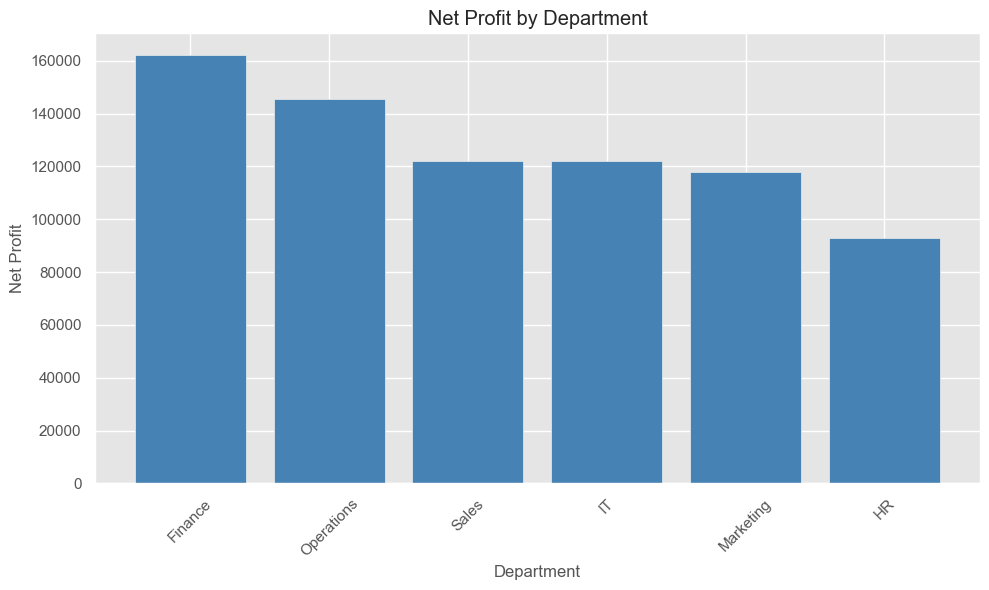

In [15]:
import matplotlib.pyplot as plt

# Set figure size and style
plt.figure(figsize=(10, 6))
plt.style.use("ggplot")

# Plot bar chart of Net Profit per department
plt.bar(dept_pnl["Dept"], dept_pnl["NetProfit"], color="steelblue")

# Add labels and title
plt.xlabel("Department")
plt.ylabel("Net Profit")
plt.title("Net Profit by Department")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
# Calculate total net profit across all departments
total_net = dept_pnl["NetProfit"].sum()

# Add a column for percentage contribution
dept_pnl["ProfitShare%"] = (dept_pnl["NetProfit"] / total_net * 100).round(2)

In [17]:
print(dept_pnl[["Dept", "NetProfit", "ProfitShare%"]])

         Dept  NetProfit  ProfitShare%
0     Finance  162279.24         21.27
4  Operations  145631.91         19.09
5       Sales  122170.17         16.01
2          IT  122080.79         16.00
3   Marketing  117831.01         15.44
1          HR   93048.34         12.19


In [18]:
# Filter departments with negative net profit
loss_making_depts = dept_pnl[dept_pnl["NetProfit"] < 0]

In [19]:
# Add performance category based on net profit
dept_pnl["Performance"] = dept_pnl["NetProfit"].apply(
    lambda x: "High Performer" if x > 100000 else ("Loss Maker" if x < 0 else "Moderate")
)

## 📌 Step 4: Monthly Financial Trend Analysis

To understand how the company’s financial performance evolves over time, we’ll analyze monthly totals for revenue and expenses.  
This helps identify seasonal patterns, growth trends, and periods of high or low activity.

### Why it's useful:
- Reveals peak revenue months and high-cost periods  
- Supports forecasting and budget planning  
- Adds strategic depth to the financial analysis

In [20]:
# Create a new column for Year-Month format
df["YearMonth"] = df["TxnDate"].dt.to_period("M").astype(str)

In [21]:
# Filter revenue accounts and group by month
monthly_revenue = df[df["AccountName"].isin(["Sales Revenue", "Online Sales"])] \
                    .groupby("YearMonth")["Credit"].sum().reset_index()

# Rename column for clarity
monthly_revenue.rename(columns={"Credit": "Revenue"}, inplace=True)

In [22]:
# Filter expense accounts and group by month
monthly_expenses = df[df["AccountName"].isin(["COGS", "Payroll Expense", "Travel Expense"])] \
                     .groupby("YearMonth")["Debit"].sum().reset_index()

# Rename column for clarity
monthly_expenses.rename(columns={"Debit": "Expenses"}, inplace=True)

In [23]:
# Merge revenue and expenses by month
monthly_trend = pd.merge(monthly_revenue, monthly_expenses, on="YearMonth", how="outer")

# Fill missing values with 0
monthly_trend.fillna(0, inplace=True)

# Calculate net profit per month
monthly_trend["NetProfit"] = monthly_trend["Revenue"] - monthly_trend["Expenses"]

# Sort by date
monthly_trend = monthly_trend.sort_values(by="YearMonth")

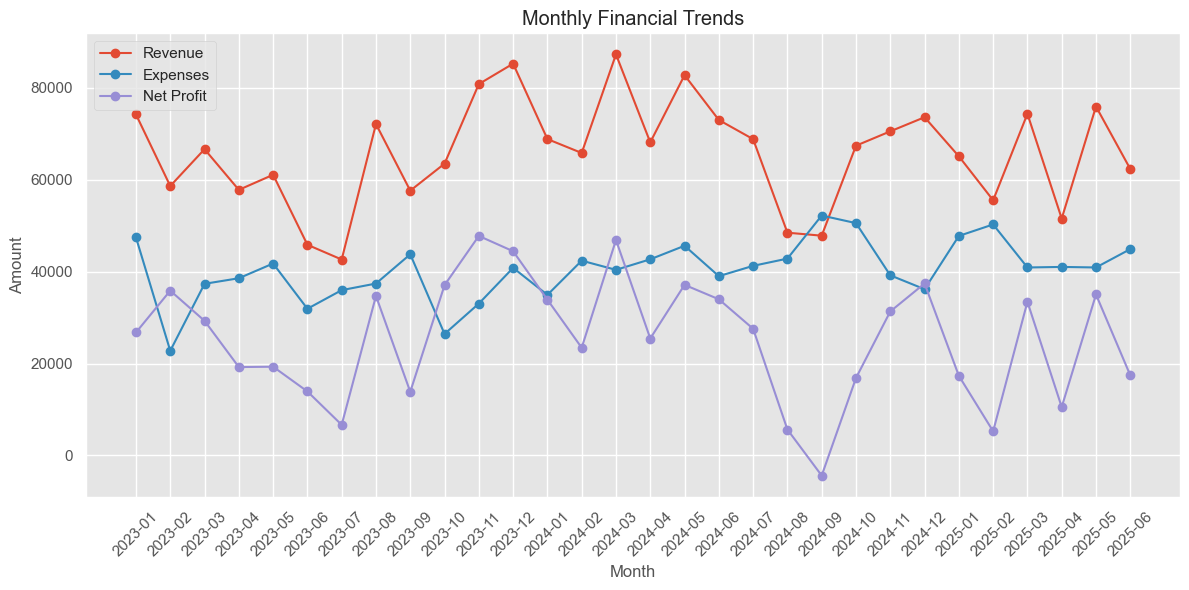

In [24]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Plot revenue, expenses, and net profit
plt.plot(monthly_trend["YearMonth"], monthly_trend["Revenue"], label="Revenue", marker="o")
plt.plot(monthly_trend["YearMonth"], monthly_trend["Expenses"], label="Expenses", marker="o")
plt.plot(monthly_trend["YearMonth"], monthly_trend["NetProfit"], label="Net Profit", marker="o")

# Add labels and legend
plt.xlabel("Month")
plt.ylabel("Amount")
plt.title("Monthly Financial Trends")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

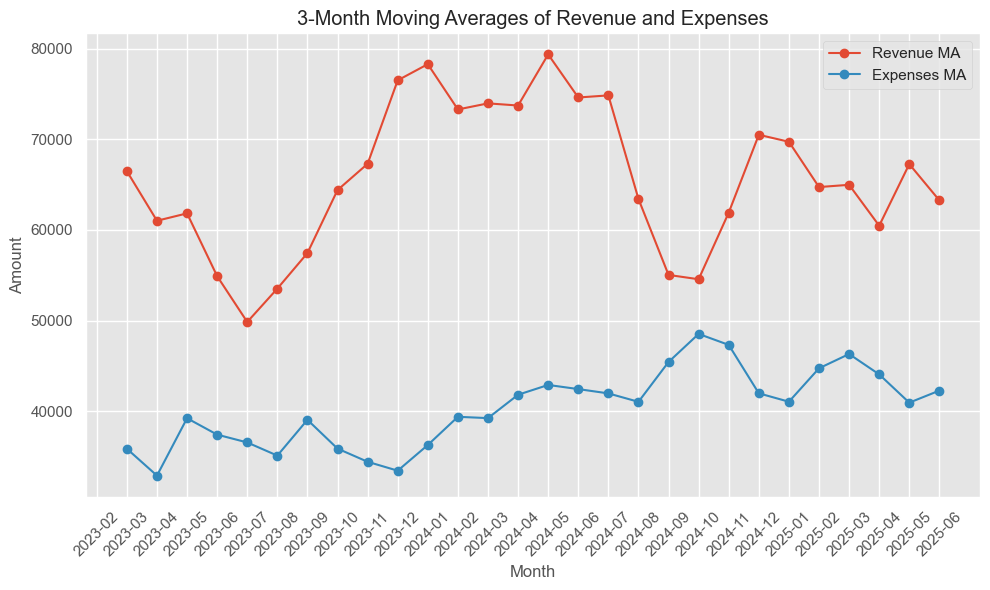

In [25]:
# Add 3-month moving average for revenue and expenses
monthly_trend["Revenue_MA"] = monthly_trend["Revenue"].rolling(window=3).mean()
monthly_trend["Expenses_MA"] = monthly_trend["Expenses"].rolling(window=3).mean()

# Plot the moving averages
plt.figure(figsize=(10, 6))
plt.plot(monthly_trend["YearMonth"], monthly_trend["Revenue_MA"], label="Revenue MA", marker="o")
plt.plot(monthly_trend["YearMonth"], monthly_trend["Expenses_MA"], label="Expenses MA", marker="o")
plt.title("3-Month Moving Averages of Revenue and Expenses")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


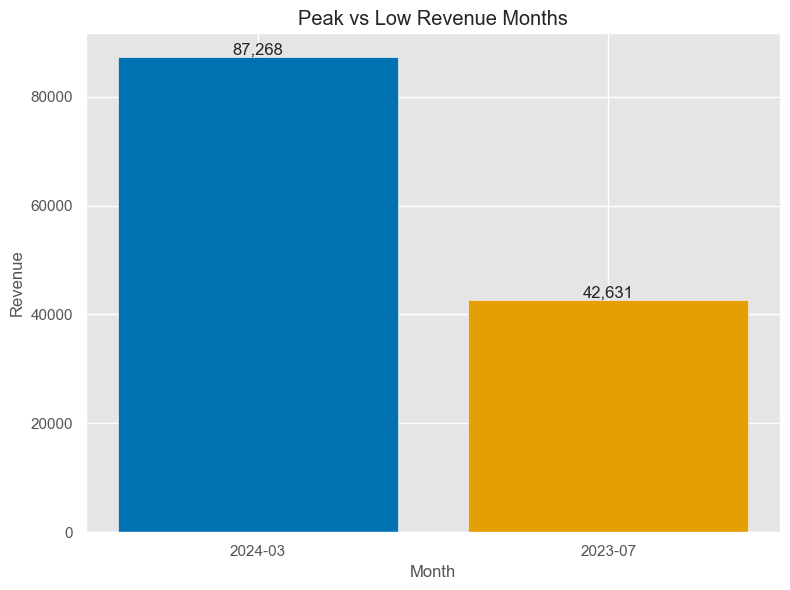

In [26]:
# Identify peak and low revenue months
peak_month = monthly_trend.loc[monthly_trend["Revenue"].idxmax()]
low_month = monthly_trend.loc[monthly_trend["Revenue"].idxmin()]

# Prepare data for chart
import pandas as pd
import matplotlib.pyplot as plt

comparison_df = pd.DataFrame({
    "Month": [peak_month["YearMonth"], low_month["YearMonth"]],
    "Revenue": [peak_month["Revenue"], low_month["Revenue"]]
})

# Plot bar chart with colorblind-safe colors
plt.figure(figsize=(8, 6))
bars = plt.bar(comparison_df["Month"], comparison_df["Revenue"], color=["#0072B2", "#E69F00"])  # Blue & Orange

plt.title("Peak vs Low Revenue Months")
plt.xlabel("Month")
plt.ylabel("Revenue")

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500, f"{height:,.0f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

## 📌 Step 5: Expense Breakdown by Type

To understand where the company spends the most, we’ll group expenses by account type.  
This helps identify major cost drivers and supports budget optimization.

### Why it's useful:
- Reveals which expense categories consume the most resources  
- Helps prioritize cost control efforts  
- Adds clarity to operational spending

In [27]:
# Filter only expense-related accounts
expense_accounts = ["Payroll Expense", "Travel Expense", "COGS"]

# Group by AccountName and sum Debit values
expense_summary = df[df["AccountName"].isin(expense_accounts)] \
                    .groupby("AccountName")["Debit"].sum().reset_index()

# Rename column for clarity
expense_summary.rename(columns={"Debit": "TotalExpense"}, inplace=True)

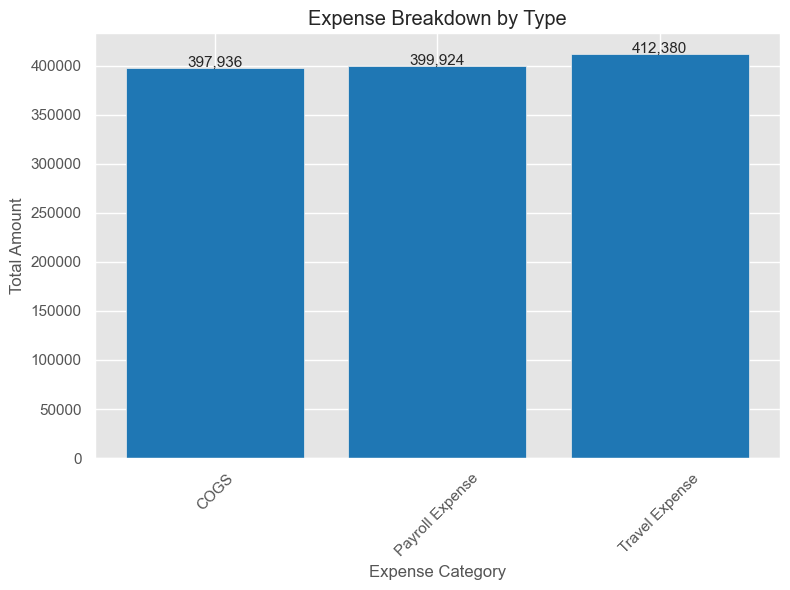

In [28]:
import matplotlib.pyplot as plt

# Set figure size and style
plt.figure(figsize=(8, 6))
plt.bar(expense_summary["AccountName"], expense_summary["TotalExpense"], color="#1f77b4")

# Add labels and title
plt.title("Expense Breakdown by Type")
plt.xlabel("Expense Category")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)

# Annotate bars with values
for index, row in expense_summary.iterrows():
    plt.text(index, row["TotalExpense"] + 500, f"{row['TotalExpense']:,.0f}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

# ✅ Step 6: Final Report Assembly
# 📊 Financial Analysis for XYZ Company – FY2025

---

## 1. Data Overview
- Source: General Ledger (multi-year Excel)
- Total records: [insert row count]
- Columns: TxnDate, AccountName, Dept, CostCenter, Debit, Credit
- Missing values: [insert if any]

---

## 2. Trial Balance Summary

| Account Name     | Debit      | Credit     | Net         |
|------------------|------------|------------|-------------|
| Online Sales     | 0.00       | 1,014,147.86 | -1,014,147.86 |
| Sales Revenue    | 0.00       | 959,134.07  | -959,134.07  |
| Travel Expense   | 412,380.48 | 0.00        | 412,380.48   |
| Payroll Expense  | 399,923.66 | 0.00        | 399,923.66   |
| COGS             | 397,936.33 | 0.00        | 397,936.33   |

---

## 3. Profit & Loss Statement

- Total Revenue: [insert sum of revenue]
- Total Expenses: [insert sum of expenses]
- Net Profit: [insert net profit]

---

## 4. Department-Level Performance

| Dept       | Revenue   | COGS     | Expenses | Net Profit | Profit Share % | Performance     |
|------------|-----------|----------|----------|------------|----------------|-----------------|
| Finance    | 361,822.40| 68,528.65| 131,014.51| 162,279.24 | 21.27%         | High Performer  |
| Operations | 321,762.59| 49,254.35| 126,876.33| 145,631.91 | 19.09%         | High Performer  |
| Sales      | 327,128.81| 54,345.88| 150,612.76| 122,170.17 | 16.01%         | High Performer  |
| IT         | 323,974.21| 63,932.48| 137,960.94| 122,080.79 | 16.00%         | High Performer  |
| Marketing  | 318,475.76| 70,065.35| 130,579.40| 117,831.01 | 15.44%         | High Performer  |
| HR         | 320,118.16| 91,809.62| 135,260.20| 93,048.34  | 12.19%         | Moderate        |

---

## 5. Monthly Financial Trends

| Month     | Revenue   | Expenses  | Net Profit | Revenue MA | Expenses MA |
|-----------|-----------|-----------|------------|------------|-------------|
| 2023-01   | 74,205.68 | 47,448.61 | 26,757.07  | NaN        | NaN         |
| ...       | ...       | ...       | ...        | ...        | ...         |
| 2025-06   | 62,327.48 | 44,894.95 | 17,432.53  | 63,267.89  | 42,272.85   |

- Peak Revenue Month: December 2023 – 85,252.71  
- Lowest Revenue Month: February 2025 – 55,524.89  
- Negative Net Profit: September 2024 – -4,386.29

---

## 6. Expense Breakdown by Type

| Expense Category   | Total Expense |
|--------------------|---------------|
| Travel Expense     | 412,380.48    |
| Payroll Expense    | 399,923.66    |
| COGS               | 397,936.33    |

- Highest Expense: Travel  
- Lowest Expense: COGS

---

## 7. Key Insights

- Finance department leads profitability with 21.27% share  
- HR is the lowest contributor but still profitable  
- December consistently shows peak revenue  
- Travel expenses dominate cost structure  
- September 2024 shows negative net profit—requires investigation

---

## 8. Recommendations

- Review travel expense policies for cost optimization  
- Investigate September 2024 performance dip  
- Consider boosting HR efficiency or reallocation  
- Maintain strong performance in Finance and Sales departments

